In [1]:
pip install xgboost lightgbm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 812.7 kB/s eta 0:03:05
   ---------------------------------------- 0.1/150.0 MB 1.0 MB/s eta 0:02:27
   ---------------------------------------- 0.3/150.0 MB 1.8 MB/s eta 0:01:22
   ---------------------------------------- 0.6/150.0 MB 3.0 MB/s eta 0:00:50
   ---------------------------------------- 1.2/150.0 MB 4.7 MB/s eta 0:00:32
   ---------------------------------------- 1.2/150.0 MB 4.8 MB/s eta 0:00:31
    --------------------------------------- 3.1/150.0 MB 9.1 MB/s eta 0:00:17
   - -------------------------------------- 4.0/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 4.8/150.0 MB 11.0 MB/s eta 0:00:14
   - ---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [3]:
#load Dataset
df = pd.read_csv(r"C:\Users\User\Downloads\Crop_recommendation.csv")

In [4]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [7]:
#Features and Target
X = df[["N", "P", "K", "temperature","humidity","ph","rainfall"]]
y = df["label"]

In [8]:
# Encoding target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [14]:
# Dictionary to store models and their hyperparameters
models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'max_depth': [3, 5, 10, 20, None],
            'criterion': ['gini', 'entropy']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    "Extra Trees": {
        "model": ExtraTreesClassifier(),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None]
        }
    },
#     "XGBoost": {
#         "model": xgb.XGBClassifier(eval_metric='mlogloss'),
#         "params": {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 0.2]
#         }
#     },
#     "LightGBM": {
#         "model": lgb.LGBMClassifier(),
#         "params": {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 0.2]
#         }
#     }
    
  }


In [15]:
# Dictionary to store model results
model_results = {}

In [16]:
# Train and tune models
from sklearn.metrics import f1_score
for model_name, mp in models.items():
    print(f"\nTraining {model_name}...")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted for multi-class

    print(f"Best Parameters: {clf.best_params_}")
    print(f"Accuracy: {acc}")
    print(f"F1 Score: {f1}")

    model_results[model_name] = {
        'model': clf.best_estimator_,
        'accuracy': acc,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }



Training Logistic Regression...
Best Parameters: {'C': 100, 'solver': 'liblinear'}
Accuracy: 0.956060606060606
F1 Score: 0.9554875637547416

Training Decision Tree...
Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Accuracy: 0.9787878787878788
F1 Score: 0.97871189922245

Training Random Forest...
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.9939393939393939
F1 Score: 0.9939295860298994

Training SVM...
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.9772727272727273
F1 Score: 0.9771423611486408

Training KNN...
Best Parameters: {'n_neighbors': 5}
Accuracy: 0.9696969696969697
F1 Score: 0.9696217444806753

Training Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9863636363636363
F1 Score: 0.9863187857759533

Training Extra Trees...
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.9893939393939394
F1 Score: 0.9893602043405715


In [17]:
# Compare Models
result_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [model_results[m]['accuracy'] for m in model_results],
    'f1_score': [model_results[m]['f1_score'] for m in model_results]
})

print("\nModel Comparison:")
print(result_df)



Model Comparison:
                 Model  Accuracy  f1_score
0  Logistic Regression  0.956061  0.955488
1        Decision Tree  0.978788  0.978712
2        Random Forest  0.993939  0.993930
3                  SVM  0.977273  0.977142
4                  KNN  0.969697  0.969622
5    Gradient Boosting  0.986364  0.986319
6          Extra Trees  0.989394  0.989360


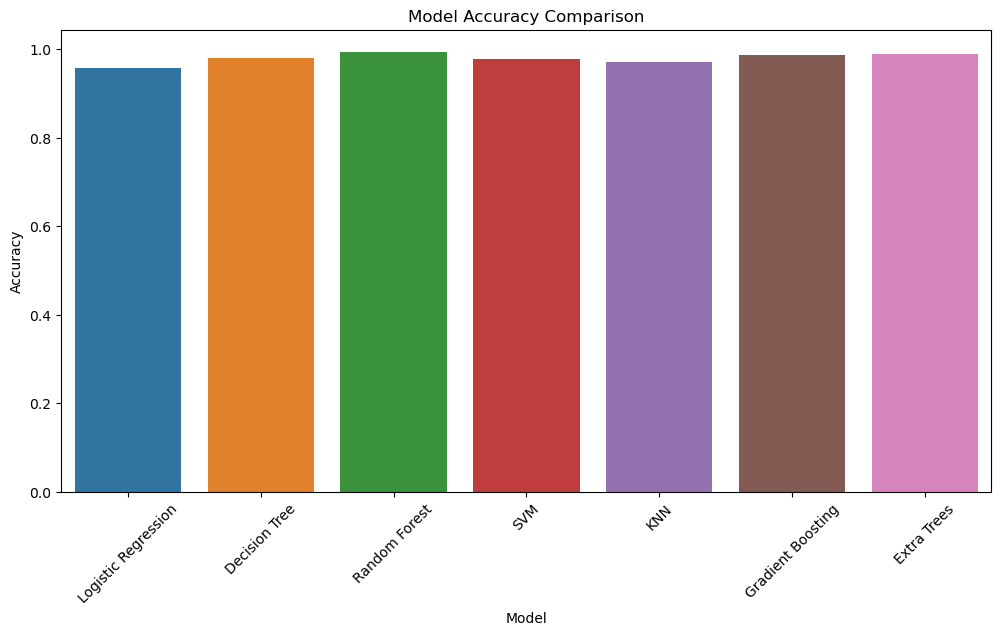

In [18]:
# Plot Model Performance
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Accuracy', data=result_df)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()

In [19]:
# Find the best model
best_model_name = result_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
print(f"\nBest Model: {best_model_name}")
best_model = model_results[best_model_name]['model']


Best Model: Random Forest


In [20]:
# Retrain best model on full data
best_model.fit(X_scaled, y_encoded)

RandomForestClassifier(max_depth=10)

In [21]:
best_model.predict([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

array([0])

In [22]:
import pickle

In [23]:
pickle.dump(best_model, open("model_best_model.pkl", "wb"))